# 概述
## 决策树是如何工作的
决策树（Decision Tree）是一种非参数的有监督学习方法，它能够从一系列有特征和标签的数据中总结出决策规
则，并用树状图的结构来呈现这些规则，以解决分类和回归问题。决策树算法容易理解，适用各种数据，在解决各
种问题时都有良好表现，尤其是以树模型为核心的各种集成算法，在各个行业和领域都有广泛的应用。

## 构建决策数的两个阶段

>1. 训练阶段  
从给定的训练数据集DB，构造出一颗决策树  
`class = DecisionTree(DB)`   
2. 分类阶段  
从根开始，按照决策树的分类属性逐层往下划分，知道叶节点，获得概念(决策、分类)  
`y = DecisionTree(x)`




## 相关概念

![](images/concept.png)

# 决策树算法

## 构建决策树
原则上讲，任意一个数据集上的所有特征都可以被拿来分
枝，特征上的任意节点又可以自由组合，所以一个数据集上可以发展出非常非常多棵决策树，其数量可达指数级。在
这些树中，总有那么一棵树比其他的树分类效力都好，那样的树叫做”全局最优树“。

|**关键概念：全局最优、局部最优**|
|  :------------------------ |  
|全局最优：经过组合形成的，整体来说分类效果最好的模型|
|局部最优：每一次分枝的时候都向着更好的分类效果分枝，但无法确认如此生成的树在全局上是否是最优的|

要在这么多棵决策树中去一次性找到分类效果最佳的那一棵是不可能的，如果通过排列组合来进行筛选，计算量过于
大而且低效，因此我们不会这样做。相对的，机器学习研究者们开发了一些有效的算法，能够在合理的时间内构造出
具有一定准确率的**次最优**决策树。这些算法基本都执行”**贪心策略**“，即通过局部的最优来达到我们相信是最接近全局
最优的结果。

|关键概念：贪心算法|
| :---------|
|通过实现局部最优来达到接近全局最优结果的算法，所有的树模型都是这样的算法。|

## 算法的核心解决问题

1. 如何从数据表中找出最佳点和最佳分支
2. 如何让决策树停止生长，防止过拟合


## 选择根节点(信息增益最大的当成根节点)

### 决策树-熵
>熵：表示数据内部混乱程度。熵越大越混乱。


相关符合表示：  
$H(X), H(Y)：表示当前事情X,Y发生的不确定性。$  
$P(X)，P(Y)：表示当前事情发生的概率。$  
$P(X)越大 --> H(X)越小。(可以这么理解，一件事情发生的概率越大说明它的不确定性越小。)$  
$P(X)越小 --> H(X)越大。(可以这么理解，一件事情发生的概率越小说明它的不确定性越大。)$  

 

假设：$A = \{1,2,3,4,1,2,1\}$  数字表示A里面的类别  
$B = \{1,1,1,1,1,2\}$


由于A的类别很多，杂乱无章，我们可以说A的熵值很大，不纯度高。   
由于B的类别很少(1或者2), B相对于A而言，我们可以说B的熵值很小，不纯度低。

|重要概念：不纯度|  
| :----- |
|决策树的每个叶子节点中都会包含一组数据，在这组数据中，如果有某一类标签占有较大的比例，我们就说叶子
节点“纯”，分枝分得好。某一类标签占的比例越大，叶子就越纯，不纯度就越低，分枝就越好。
如果没有哪一类标签的比例很大，各类标签都相对平均，则说叶子节点”不纯“，分枝不好，不纯度高|

### 公式

$熵= - \displaystyle\sum_{i=1}^{n}P_iln(P_i)$

![](images/shang.png)

理解：当P比较小时，对应的lnP会比较大，所以能得到较大是熵，说明当前集合的混乱程度比较大。  
当P比较大时，对应的lnP会比较小，所以得到的熵值比较小，说明当前集合的混乱程度比较小。  


### Gini(基尼系数)

$Gini系数 = Gini(p) = \displaystyle \sum_{k=1}^{K}p_k(1-p_k) = 1 - \displaystyle \sum_{k=1}^{K}p_k^2  
\text{(p为某一类别发生的概率)}$  

## 构造决策树的基本想法

>构造决策树的基本想法是随着树深度的增加，节点的熵**迅速下降**。熵下降的速度越快越好，这样我们就可以构造一颗**最矮**的决策树。(能用少量有用的信息解决事情越好)

### 示例

根据前面的特征(outlook, temperature, humidty, windy)，判断是否出去打篮球(play)

![](images/example1.png)

![](images/decision1.png)

### 1.计算原始数据的熵值
在没有给定任何天气信息时，根据历史数据，我们能知道一天打球的概率是9/14， 不打的概率是5/14。此时的熵为：  
$-\dfrac{9}{14}log_2\dfrac{9}{14} - \dfrac{5}{14}log_2\dfrac{5}{14} = 0.940$

### 2. 计算候选节点的熵值

下面我们计算当已知变量outlook的值时，信息熵为多少？

![](images/decision2.png)


对其加权求和

![](images/decision3.png)


### 信息增益

>信息增益表示：熵值发生的变化。  



![](images/decision4.png)



## ID3：：信息增益算法

信息增益的缺点：一些特征里面存在的属性很多，但是每个属性对应的的样本很少，这样会造成很大的信息增益。  
示例： 我们为每一个样本增加一个ID(ID与结论无关，只是数据的一个标志)


![](images/decision5.png)


现在我们先考虑把ID当成根节点：  
那么ID对应的信息熵为：  
$\dfrac{1}{14}\times(-1\times log_2(1)) + \cdots + \dfrac{1}{14}\times(-1\times log_2(1)) = 0$  
熵值为0，信息增益最大，我们知道ID只是对样本的一个编号，不会对结论造成影响。但是，通过计算得到的结果会让我们错误地把ID当成根节点。

## C4.5(信息增益率)

对应每个属性除以它自身的信息增益再求累加和

## 评价函数

$C(T) = \displaystyle \sum_{t∈leaf}N_tH(t)$  （类似于损失函数，越小越好）

## 连续值的分界选择(如，年龄)
![](images/decision6.png)


# 剪枝操作

为什么要剪枝？  
如果不剪枝的话，很容易导致过拟合。   
如果决策树过于庞大，它包含的信息可能在训练集上很不错，但在测试集上很容易导致过拟合了，把一些噪音也涵盖进去了。


## 预剪枝

>预剪枝：在构建决策树过程中，能提前停止。

1. 设置最大深度
2. 设置最小节点


## 后剪枝
>后剪枝：构建完决策树后，才开始剪枝操作

1. 修改损失函数
![](images/decision7.png)


# 随机森林(相当于构造多颗决策树)
## 相关概念
### 采样方式
1. Bootstraping：有放回采样  
2. Bagging：有放回采样n个样本建立分类器

## 随机
### 双重随机性
1. 数据选择的随机性
2. 特征随机性

![](images/decision8.png)

# sklearn中的决策树


## 模块sklearn.tree
|tree.DecisionTreeClassifier| 分类树|
| -------------------------|------ |
| tree.DecisionTreeRegressor| 回归树|  
| tree.export_graphviz      |将生成的决策树导出为DOT格式，画图专用|
| tree.ExtraTreeClassifier  |高随机版本的分类树|  
| tree.ExtraTreeRegressor   | 高随机版本的回归树|


## sklearn的基本建模流程
1. 实例化，建立评估模型对象
2. 通过模型接口训练模型
3. 通过模型接口提取需要的信息  
对应代码如下：

```python
from sklearn import tree  # 导入模块

clf = tree.DecisionTreeClassifier()  # 实例化，可以调参
clf = clf.fit(x_train, y_train)  # 训练模型
result = clf.score(x_test, y_test)  # 评估模型
```

## 利用DecisionTreeClassifier创建红酒数据集

```python
DecisionTreeClassifier()

Init signature:  
tree.DecisionTreeClassifier(  
    criterion='gini',  
    splitter='best',  
    max_depth=None,  
    min_samples_split=2,  
    min_samples_leaf=1,  
    min_weight_fraction_leaf=0.0,  
    max_features=None,  
    random_state=None,  
    max_leaf_nodes=None,  
    min_impurity_decrease=0.0,  
    min_impurity_split=None,  
    class_weight=None,  
    presort=False,  
)
```

### 重要参数解读
#### criterion(评估标准)
为了要将表格转化为一棵树，决策树需要找出最佳节点和最佳的分枝方法，对分类树来说，衡量这个“最佳”的指标
叫做“不纯度”。通常来说，**不纯度越低，决策树对训练集的拟合越好**。现在使用的决策树算法在分枝方法上的核心
大多是围绕在对某个不纯度相关指标的最优化上。

![](images/decision9.png)

>Criterion：用于决定不纯度的计算方法。sklearn提供了两种选择：  
1. entropy：信息熵
2. gini：基尼系数  
  
$$Entropy(t) = - \displaystyle \sum_{i=0}^{c-1}p(i|t)log_2p(i|t)$$  
$$Gini(t) = 1 - \displaystyle \sum_{i = 0}^{c - 1}p(i|t)^2$$




其中t代表给定的节点，i代表标签的任意分类， $p(i|t)$代表标签分类i在节点t上所占的比例。注意，当使用信息熵
时，sklearn实际计算的是基于信息熵的信息增益(Information Gain)，即父节点的信息熵和子节点的信息熵之差。
比起基尼系数，**信息熵对不纯度更加敏感，对不纯度的惩罚最强**。但是**在实际使用中，信息熵和基尼系数的效果基
本相同。**信息熵的计算比基尼系数缓慢一些，因为基尼系数的计算不涉及对数。另外，因为信息熵对不纯度更加敏
感，所以信息熵作为指标时，决策树的生长会更加“精细”，因此对于高维数据或者噪音很多的数据，信息熵很容易
过拟合，基尼系数在这种情况下效果往往比较好。当模型拟合程度不足的时候，即当模型在训练集和测试集上都表
现不太好的时候，使用信息熵。当然，这些不是绝对的。

|参数 |criterion|
| ----|:--------|
|如何影响模型? |确定不纯度的计算方法，帮忙找出最佳节点和最佳分枝，不纯度越低，决策树对训练集的拟合越好|
|可能的输入有哪些？| 不填默认基尼系数，填写gini使用基尼系数，填写entropy使用信息增益|
|怎样选取参数？|通常就使用基尼系数<br>数据维度很大，噪音很大时使用基尼系数<br>维度低，数据比较清晰的时候，信息熵和基尼系数没区别<br>当决策树的拟合程度不够的时候，使用信息熵<br>两个都试试，不好就换另外一个

#### random_state & splitter

random_state用来设置分枝中的随机模式的参数，默认None，在高维度时随机性会表现更明显，低维度的数据
（比如鸢尾花数据集），随机性几乎不会显现。输入任意整数，会一直长出同一棵树，让模型稳定下来。
splitter也是用来控制决策树中的随机选项的，有两种输入值，输入”best"，决策树在分枝时虽然随机，但是还是会
优先选择更重要的特征进行分枝（重要性可以通过属性feature_importances_查看），输入“random"，决策树在
分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。这
也是防止过拟合的一种方式。当你预测到你的模型会过拟合，用这两个参数来帮助你降低树建成之后过拟合的可能
性。当然，树一旦建成，我们依然是使用剪枝参数来防止过拟合


#### 剪枝参数
在不加限制的情况下，一棵决策树会生长到衡量不纯度的指标最优，或者没有更多的特征可用为止。这样的决策树
往往会过拟合，这就是说，**它会在训练集上表现很好，在测试集上却表现糟糕**。我们收集的样本数据不可能和整体
的状况完全一致，因此当一棵决策树对训练数据有了过于优秀的解释性，它找出的规则必然包含了训练样本中的噪
声，并使它对未知数据的拟合程度不足。

为了让决策树有更好的泛化性，我们要对决策树进行剪枝。剪枝策略对决策树的影响巨大，正确的剪枝策略是优化
决策树算法的核心。sklearn为我们提供了不同的剪枝策略：

##### max_depth

>限制树的最大深度，超过设定深度的树枝全部剪掉  

这是用得最广泛的剪枝参数，在高维度低样本量时非常有效。决策树多生长一层，对样本量的需求会增加一倍，所
以限制树深度能够有效地限制过拟合。在集成算法中也非常实用。实际使用时，建议从=3开始尝试，看看拟合的效
果再决定是否增加设定深度

##### min_samples_leaf
min_samples_leaf限定，一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分
枝就不会发生，或者，分枝会朝着满足每个子节点都包含min_samples_leaf个样本的方向去发生
一般搭配max_depth使用，在回归树中有神奇的效果，可以让模型变得更加平滑。这个参数的数量设置得太小会引
起过拟合，设置得太大就会阻止模型学习数据。一般来说，建议从=5开始使用。如果叶节点中含有的样本量变化很
大，建议输入浮点数作为样本量的百分比来使用。同时，这个参数可以保证每个叶子的最小尺寸，可以在回归问题
中避免低方差，过拟合的叶子节点出现。对于类别不多的分类问题，=1通常就是最佳选择

##### min_samples_split

min_samples_split限定，一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则
分枝就不会发生

##### max_features & min_impurity_decrease
一般max_depth使用，用作树的”精修“
max_features限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃。和max_depth异曲同工，
max_features是用来限制高维度数据的过拟合的剪枝参数，但其方法比较暴力，是直接限制可以使用的特征数量
而强行使决策树停下的参数，在不知道决策树中的各个特征的重要性的情况下，强行设定这个参数可能会导致模型
学习不足。如果希望通过降维的方式防止过拟合，建议使用PCA，ICA或者特征选择模块中的降维算法。
min_impurity_decrease限制信息增益的大小，信息增益小于设定数值的分枝不会发生。这是在0.19版本中更新的
功能，在0.19版本之前时使用min_impurity_split

![](images/decision10.png)

### 实操


#### 调包

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split  
import pandas as pd

#### 加载数据

In [2]:
# 加载数据
wine = load_wine() 
# 显示数据
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

#### 显示数据

In [3]:
# 显示数据的结果/分类
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
# 数据处理，合并数据
wine_df = pd.concat([pd.DataFrame(wine.data, columns=wine.feature_names),
                    pd.DataFrame(wine.target, columns=['class'])], 
                    axis=1)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
# 显示特征名
wine.feature_names  

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
# 显示分类
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

#### 分训练集和测试集


In [8]:
# 一定要严格按照格式写，不然可能导数训练和测试乱了
# test_size:表示测试集占总的数据的比例
x_train, x_test, y_train, y_test = train_test_split(wine.data, 
                                                    wine.target,
                                                    test_size=0.3
                                                    )
x_train.shape

(124, 13)

#### 建立模型

In [9]:
clf = tree.DecisionTreeClassifier(criterion='entropy')  # 修改标准为信息增益
clf = clf.fit(x_train, y_train)
# 返回测试的准确度
score = clf.score(x_test, y_test)

score

0.9629629629629629

#### 画出一棵树

In [10]:
import graphviz

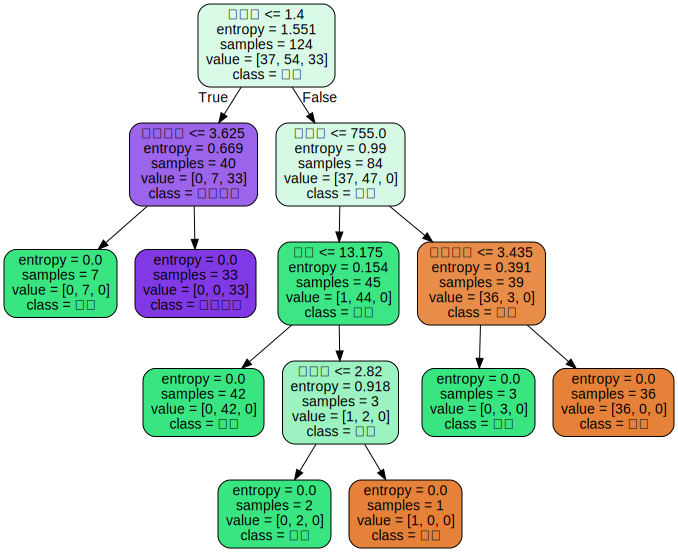

In [11]:
feature_names = ['酒精','苹果酸','灰','灰的碱性','镁','总酚',
                 '类黄酮','非黄烷类酚类','花青素','颜色强度',
                 '色调','od280/od315稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=feature_names,
                                class_names=['琴酒','雪莉','贝尔摩德'],
                                filled=True,  # 设置叶颜色
                                rounded=True,  # 设置叶子为圆形
#                                 label=False
                               )
graph = graphviz.Source(dot_data)
graph

#### 探索决策树

In [12]:
# 显示特征的重要性(权重)
clf.feature_importances_
[*zip(feature_names, clf.feature_importances_)]

[('酒精', 0.02164643433240562),
 ('苹果酸', 0.014322886851263617),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.42862165401355806),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.2184609274421724),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.3169480973606003)]

In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=30)
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
score

0.9814814814814815

#### 修改random_state&splitter参数

In [14]:
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  random_state=32,
                                  splitter='random')  # splitter='best' by default
clf = clf.fit(x_train, y_train)

score = clf.score(x_test, y_test)
score

0.9444444444444444

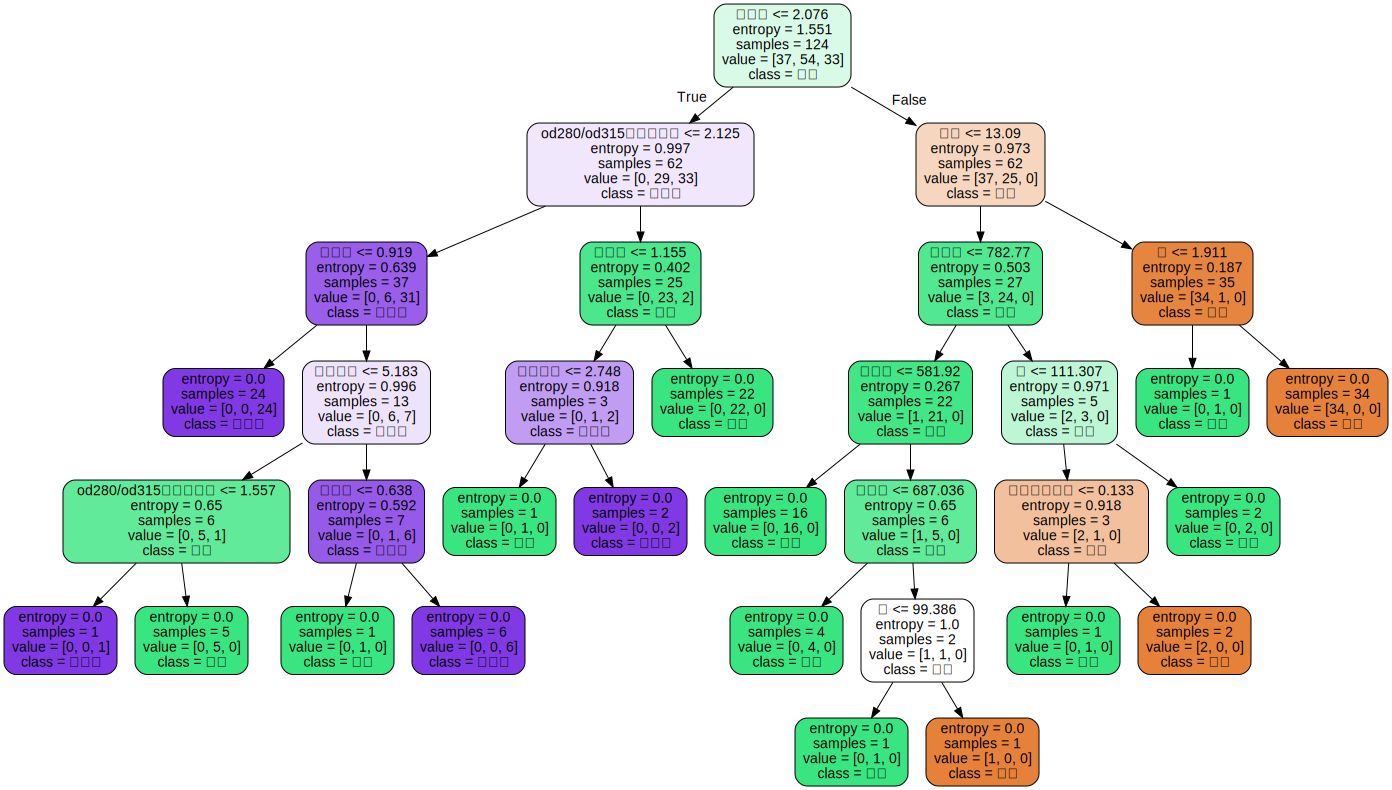

In [15]:
dot_data = tree.export_graphviz(clf, 
                                feature_names=feature_names,
                                class_names=['清酒', '茅台','五粮液'],
                                filled=True,
                                rounded=True
                                )
graphviz.Source(dot_data)

In [16]:
[*zip(feature_names, clf.feature_importances_)]

[('酒精', 0.20887234084362402),
 ('苹果酸', 0.0),
 ('灰', 0.03406006674379356),
 ('灰的碱性', 0.0),
 ('镁', 0.02131553799843766),
 ('总酚', 0.0),
 ('类黄酮', 0.4587097166485914),
 ('非黄烷类酚类', 0.014322886851263615),
 ('花青素', 0.02153308829404679),
 ('颜色强度', 0.03981197478901169),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.16636781216177202),
 ('脯氨酸', 0.03500657566945914)]

#### 剪枝参数

In [17]:
def draw_graph(**kwargs):
    clf=tree.DecisionTreeClassifier(**kwargs)
    clf = clf.fit(x_train, y_train)
    dot_data = tree.export_graphviz(clf, 
                                    feature_names=feature_names,
                                    class_names=['茅台', '五粮液', '泸州老窖'],
                                    filled=True,
                                    rounded=True)
    graph = graphviz.Source(dot_data)
    return graph, clf.score(x_test, y_test)

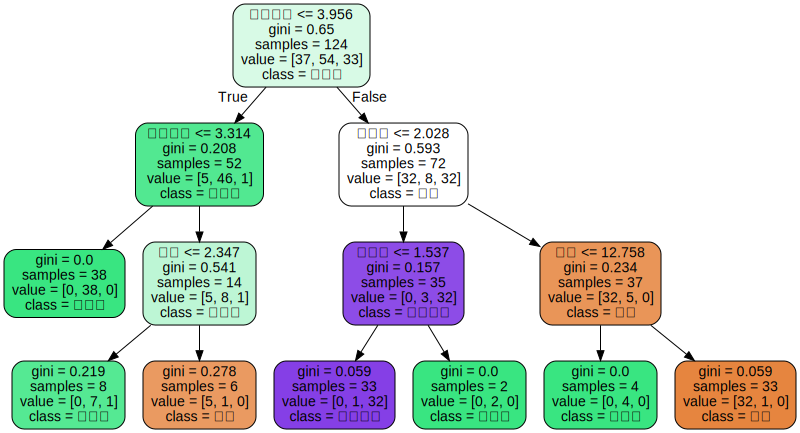

In [18]:
graph, score = draw_graph(random_state=30,
                          splitter='random',
                          max_depth=3,
                          
                          )
graph

In [19]:
score

0.9259259259259259

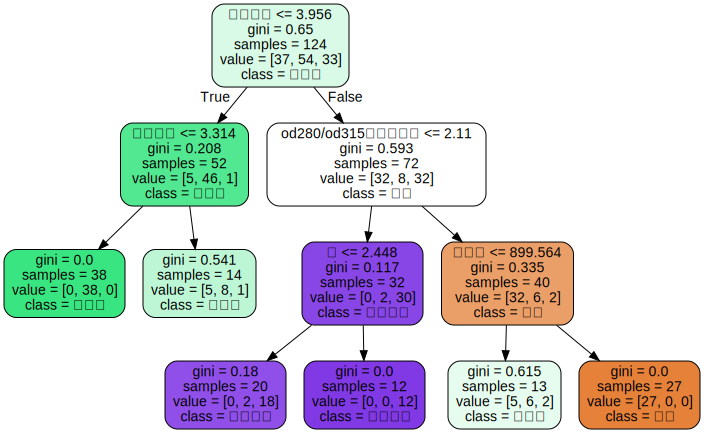

In [20]:
graph, score = draw_graph(random_state=30,
                          splitter='random',
                          max_depth=4,
                          min_samples_leaf=10
                          )
graph

In [21]:
score

0.8703703703703703

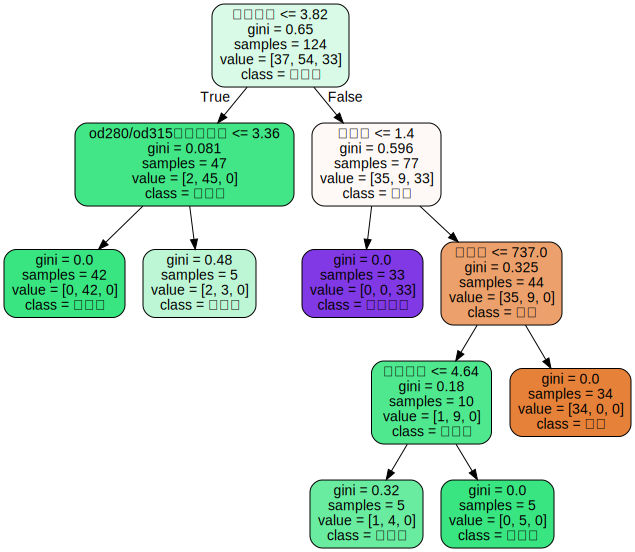

In [22]:
graph, score = draw_graph(random_state=30,
                          splitter='best',
                          max_depth=4,
                          min_samples_leaf=5,
                          min_samples_split=2
                          )
graph

In [23]:
score

0.9259259259259259

#### 确定最优参数

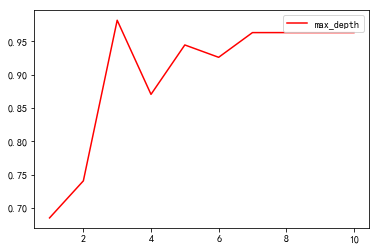

In [25]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )
    clf = clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [26]:
clf = tree.DecisionTreeClassifier(max_depth=4
                                ,criterion="entropy"
                                ,random_state=30
                                ,splitter="random"
                                )
clf = clf.fit(x_train, y_train)

In [27]:
clf.score(x_train, y_train)
clf.score(x_test, y_test)

0.8703703703703703

#### 重要属性和接口

属性是在模型训练之后，能够调用查看的模型的各种性质。对决策树来说，最重要的是feature_importances_，能
够查看各个特征对模型的重要性。  

sklearn中许多算法的接口都是相似的，比如说我们之前已经用到的fit和score，几乎对每个算法都可以使用。除了
这两个接口之外，决策树最常用的接口还有apply和predict。apply中输入测试集返回每个测试样本所在的叶子节点的索引，predict输入测试集返回每个测试样本的标签。返回的内容一目了然并且非常容易。   
在这里不得不提的是，**所有接口中要求输入X_train和X_test的部分，输入的特征矩阵必须至少是一个二维矩阵。
sklearn不接受任何一维矩阵作为特征矩阵被输入**。如果你的数据的确只有一个特征，那必须用reshape(-1,1)来给
矩阵增维；如果你的数据只有一个特征和一个样本，使用reshape(1,-1)来给你的数据增维。

In [160]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(x_test)

array([ 3, 16,  3, 19,  5, 14, 20, 16,  3, 14, 16, 10, 20, 20,  6, 20, 10,
       20, 20,  6,  5, 17, 16, 14, 20,  6,  5, 20, 14,  3,  9, 20, 10, 20,
       16, 14, 19, 16, 10, 20,  3, 20, 17, 20, 20, 20,  3, 20, 14, 20, 20,
       16, 16,  3], dtype=int64)

In [143]:
clf.predict(x_test)

array([2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0,
       1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 0, 1, 1, 2])

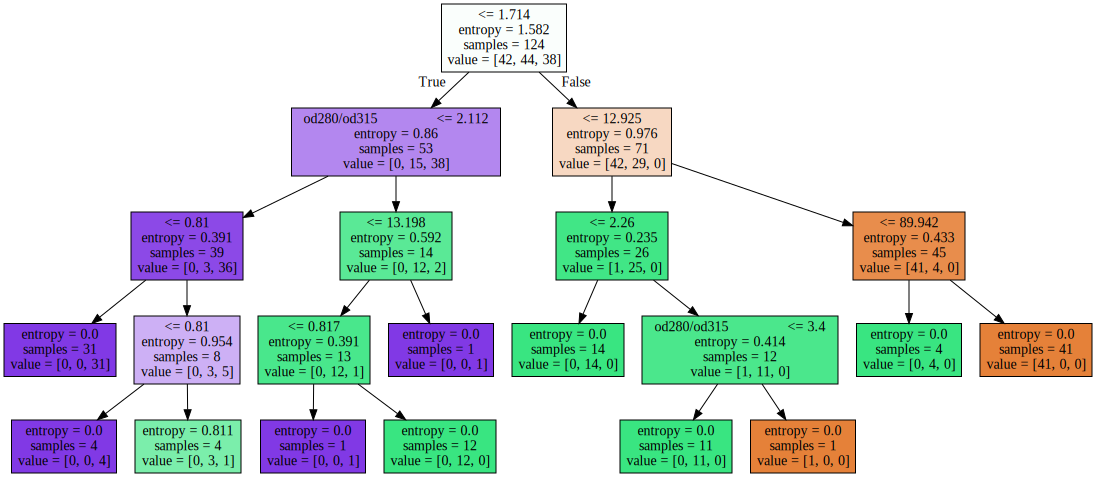

In [153]:
dot_data = tree.export_graphviz(clf,
                                feature_names=feature_names,
                                filled=True)
graph = graphviz.Source(dot_data)
graph

In [157]:
graph.save('images/graph.gv')

'images/graph.gv'

In [159]:
graph.view()

'images\\graph.gv.pdf'

# DecisionTreeRegressor(线性回归决策树)

In [34]:
from sklearn.tree import DecisionTreeRegressor


## 重要属性接口
```python
Init signature:
DecisionTreeRegressor(
    criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort=False,
)
```

### criterion(评估标准)
1. 输入"mse"使用均方误差mean squared error(MSE)，父节点和叶子节点之间的均方误差的差额将被用来作为
特征选择的标准，这种方法通过使用叶子节点的均值来最小化L2损失
2. 输入“friedman_mse”使用费尔德曼均方误差，这种指标使用弗里德曼针对潜在分枝中的问题改进后的均方误差
3. 输入"mae"使用绝对平均误差MAE（mean absolute error），这种指标使用叶节点的中值来最小化L1损失
属性中最重要的依然是feature_importances_，接口依然是apply, fit, predict, score最核心

$$MSE = \dfrac{1}{N}\displaystyle \sum_{i=1}^{N}(f_i - y_i)^2$$

其中N是样本数量，i是每一个数据样本，fi是模型回归出的数值，yi是样本点i实际的数值标签。所以MSE的本质，
其实是样本真实数据与回归结果的差异（类似于损失函数）。在回归树中，MSE不只是我们的分枝质量衡量指标，也是我们最常用的衡
量回归树回归质量的指标，当我们在使用交叉验证，或者其他方式获取回归树的结果时，我们往往选择均方误差作
为我们的评估（在分类树中这个指标是score代表的预测准确率）。在回归中，我们追求的是，**MSE越小越好**。
然而，**回归树的接口score返回的是R平方，并不是MSE**。R平方被定义如下:

$$R^2 = 1 - \dfrac{u}{v} \; \;\;其中, \\
u = \displaystyle \sum_{i=1}^{N}(f_i - y_i)^2\;\;\;\;v = \sum_{i=1}^{N}(y_i - \hat{y})^2$$

其中u为残差平方和(MSE * N), v是总平方和，N是样本数量，i是每一个数据样本，fi是模型回归出的数值，yi
是样本点i实际的数值标签。$\hat{y}$是**真实数值标签的平均数**。R平方可以为正为负（如果模型的残差平方和远远大于
模型的总平方和，模型非常糟糕，R平方就会为负），而均方误差永远为正


值得一提的是，**虽然均方误差永远为正，但是sklearn当中使用均方误差作为评判标准时，却是计算”负均方误
差“（neg_mean_squared_error）**。这是因为sklearn在计算模型评估指标的时候，会考虑指标本身的性质，均
方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)，因此在sklearn当中，都以负数表示。真正的
均方误差MSE的数值，其实就是neg_mean_squared_error去掉负号的数字


## 交叉验证


>交叉验证是用来观察模型的稳定性的一种方法，我们将数据划分为n份，依次使用其中一份作为测试集，其他n-1份
作为训练集，多次计算模型的精确性来评估模型的平均准确程度。训练集和测试集的划分会干扰模型的结果，因此
用交叉验证n次的结果求出的平均值，是对模型效果的一个更好的度量

### 使用sklearn实现交叉验证

In [37]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [39]:
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10)
                #, scoring='neg_mean_squared_error')

array([ 0.52939335,  0.60461936, -1.60907519,  0.4356399 ,  0.77280671,
        0.40597035,  0.23656049,  0.38709149, -2.06488186, -0.95162992])

sklearn fit只支持二维数据
reval降维

## 示例：一维回归的图像绘制

In [45]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [48]:
# 设置随机种子
rng = np.random.RandomState(1)
# 生成0-5区间内的随机数据 with shape (80, 1)
x = np.sort(5 * rng.rand(80,1), axis=0)
# 生成x对应的sin(y)
y = np.sin(x).ravel()  # ravel() 将数据降到一维

In [49]:
# 对y添加噪音
y[::5] += 3 * (0.5 - rng.rand(16))

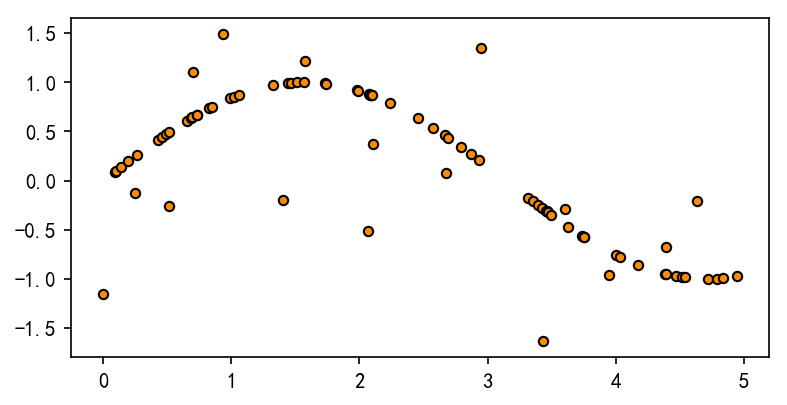

In [57]:
fig = plt.figure(dpi=150, figsize=(6,3))
plt.scatter(x, y, s=20, edgecolors='black', c='darkorange', label='data')
plt.show()

In [58]:
# 进行线性回归决策树拟合，创建3个max_path不同的决策树
regressor_1 = DecisionTreeRegressor(max_depth=2)
regressor_2 = DecisionTreeRegressor(max_depth=3)
regressor_3 = DecisionTreeRegressor(max_depth=5)

In [63]:
reg_1 = regressor_1.fit(x, y)
reg_2 = regressor_2.fit(x, y)
reg_3 = regressor_3.fit(x, y)

In [65]:
# 创建测试集
x_test = np.linspace(0, 5, 100)[:, np.newaxis]

In [66]:
# 拟合数据
y_1 = reg_1.predict(x_test)
y_2 = reg_2.predict(x_test)
y_3 = reg_3.predict(x_test)

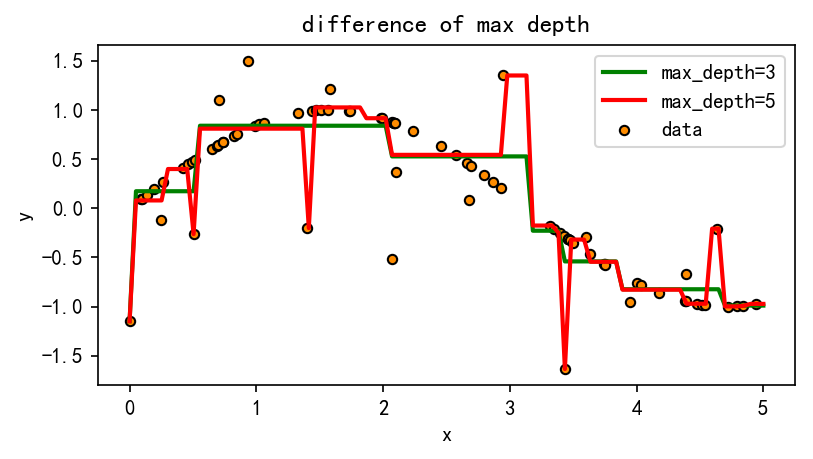

In [72]:
# 绘图
fig = plt.figure(dpi=150, figsize=(6,3))
plt.scatter(x, y, s=20, edgecolors='black', c='darkorange', label='data')
# plt.plot(x_test, y_1, color='cornflowerblue', label='max_depth=2', linewidth=2)
plt.plot(x_test, y_2, color='green', label='max_depth=3', linewidth=2)
plt.plot(x_test, y_3,color='red', label='max_depth=5', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('difference of max depth')
plt.legend(loc='best')

plt.show()

# 示例：泰坦尼克幸存者的预测

In [90]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

## 加载数据

In [94]:
data = pd.read_csv('data/titanic_data.csv', index_col=0)

In [88]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## 数据清洗

In [95]:
# 删除无效数据
data = data.drop(['Ticket', 'Cabin', 'Name'], axis=1)

In [97]:
# 填充数据
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [100]:
# 对于有些缺失值的数据，直接drop
data = data.dropna()

In [104]:
# 将分类数据转换成数值数据
data.head()
# 二分类变量转换成数据值型数据
data['Sex'] = (data["Sex"]== "male").astype("int")

In [112]:
# 多分类变量转换成数值型数据
labels = data['Embarked'].unique().tolist()
data['Embarked'] =  data['Embarked'].apply(lambda x: labels.index(x))

In [114]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


## 提取标签和特征矩阵，划分测试集和训练集

In [116]:
x = data.iloc[:, data.columns != 'Survived']
y = data.iloc[:, data.columns == 'Survived']



In [117]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=.3)

In [121]:
# 修正索引
for i in [Xtrain, Xtest, ytrain, ytest]:
    i.index = range(i.shape[0])

## 导入模型，粗略地跑一下

In [123]:
clf = DecisionTreeClassifier(random_state=25)

In [124]:
clf = clf.fit(Xtrain, ytrain)

In [129]:
score_ = clf.score(Xtest, ytest)
score_

0.7602996254681648

In [130]:
score_ = cross_val_score(clf, Xtest, ytest, cv=10).mean()
score_

0.7491452991452991

In [141]:
# import graphviz
# from sklearn import tree
# dot_data = tree.export_graphviz(clf, filled=True, rounded=True, feature_names=x.columns, class_names=['Survived', 'death'])
# graphviz.Source(dot_data)

## 在不同max_depth下观察模型拟合状况

In [162]:
# 创建一个列表用于接收拟合后的分数
tr = []
# te用于接收交叉验证后的分数
te = []

for i in range(10):
    # 这里为什么使用“entropy”？因为我们注意到，在最大深度=3的时候，模型拟合不足，在训练集和测试集上的表现接
    # 近，但却都不是非常理想，只能够达到83%左右，所以我们要使用entropy。
    temp_clf = DecisionTreeClassifier(random_state=25,
                                 max_depth=i+1,
                                criterion='entropy')
    temp_clf = temp_clf.fit(Xtrain, ytrain)
    
    temp_score = temp_clf.score(Xtrain, ytrain)
    temp_score2 = cross_val_score(temp_clf, x, y, cv=10).mean()
    
    tr.append(temp_score)
    te.append(temp_score2)

In [164]:
print(max(tr))
print(max(te))

0.9115755627009646
0.8177860061287026


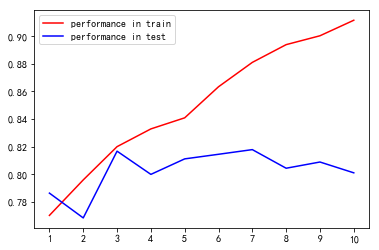

In [166]:
# 绘图
plt.plot(range(1,11), tr, color='red', label='performance in train')
plt.plot(range(1,11), te, color='blue', label='performance in test')
plt.legend()
plt.xticks(range(1, 11))
plt.show()

# 使用网格搜索调整参数
>网格搜索类似于我们调参数，只是参数可以一次性调很多个，而且全部可以交给程序去跑。  

网格搜索的优缺点很明显：可以自动调参，但是，当我们把参数传进去后，网格搜索就一定会按照传进去的参数进行选择，不会删除某些参数。


In [168]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [181]:
# gini的取值范围在0 - 0.5
# entropy的取值范围在0 - 1
gini_thresholds = np.linspace(0, 0.3, 20)
parameters = {
    'max_depth':[*range(1, 10), None],
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'min_samples_leaf':[*range(1,8)],
    'min_samples_split':[*range(2,6)],
    'min_impurity_decrease':gini_thresholds,
}




clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=5)  # 模型， 参数字典， 交叉验证划分
GS = GS.fit(Xtrain, ytrain)

D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [183]:
# 输出最佳的参数组合
print(GS.best_params_)

# 输出最好的分数
print(GS.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'}
0.8247588424437299


# 决策树的优缺点

## 优点

1. 易于理解和解释，因为树木可以画出来被看见
2. 需要很少的数据准备。其他很多算法通常都需要数据规范化，需要创建虚拟变量并删除空值等。但请注意，
**sklearn中的决策树模块不支持对缺失值的处理**。
3. 使用树的成本（比如说，在预测数据的时候）是用于训练树的数据点的数量的对数，相比于其他算法，这是
一个很低的成本。
4. 能够同时处理数字和分类数据，既可以做回归又可以做分类。其他技术通常专门用于分析仅具有一种变量类
型的数据集。
5. 能够处理多输出问题，即含有多个标签的问题，注意与一个标签中含有多种标签分类的问题区别开
6. 是一个白盒模型，结果很容易能够被解释。如果在模型中可以观察到给定的情况，则可以通过布尔逻辑轻松
解释条件。相反，在黑盒模型中（例如，在人工神经网络中），结果可能更难以解释。
7. 可以使用统计测试验证模型，这让我们可以考虑模型的可靠性。
8. 即使其假设在某种程度上违反了生成数据的真实模型，也能够表现良好

## 缺点

1. 决策树学习者可能创建过于复杂的树，这些树不能很好地推广数据。这称为过度拟合。修剪，设置叶节点所
需的最小样本数或设置树的最大深度等机制是避免此问题所必需的，而这些参数的整合和调整对初学者来说
会比较晦涩
2. 决策树可能不稳定，数据中微小的变化可能导致生成完全不同的树，这个问题需要通过集成算法来解决。
3. 决策树的学习是基于贪婪算法，它靠优化局部最优（每个节点的最优）来试图达到整体的最优，但这种做法
不能保证返回全局最优决策树。这个问题也可以由集成算法来解决，在随机森林中，特征和样本会在分枝过
程中被随机采样。
4. 有些概念很难学习，因为决策树不容易表达它们，例如XOR，奇偶校验或多路复用器问题。
5. 如果标签中的某些类占主导地位，决策树学习者会创建偏向主导类的树。因此，建议在拟合决策树之前平衡
数据集。(例如，ID)

# 实例：分类树在合成数集上的表现

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier

## 生成三种数据集

In [186]:
# make_classification 生成二分类数据集
X,y = make_classification(n_samples=100, # 生成100个样本
                         n_features=2, # 生成2个特征
                         n_redundant=0,  # 设置0个冗余特征
                         n_informative=2,  # 设置含主要信息的特征为2
                         random_state=1, # 设置随机种子,
                         n_clusters_per_class=1  # 每个簇包含的标签类别有1个
                         )

In [191]:
make_classification(n_samples=100, # 生成100个样本
                         n_features=2, # 生成2个特征
                         n_redundant=0,  # 设置0个冗余特征
                         n_informative=2,  # 设置含主要信息的特征为2
                         random_state=1, # 设置随机种子,
                         n_clusters_per_class=1  # 每个簇包含的标签类别有1个
                         )

(array([[-1.04948638,  0.8786438 ],
        [ 0.8780991 ,  0.89551051],
        [ 0.95928819,  1.03967316],
        [-1.18013412,  1.12062155],
        [-0.90731836,  1.06040861],
        [-0.62754626,  1.37661405],
        [ 0.82178321,  1.18947778],
        [-1.20376927,  0.78801845],
        [ 0.77151441,  0.345716  ],
        [-0.493857  ,  1.66752297],
        [ 1.17456965,  0.69211449],
        [ 0.82798737,  0.84806927],
        [ 0.89189141,  0.87699465],
        [ 0.90394545,  0.35413361],
        [ 0.94459507,  1.12641981],
        [ 0.9317172 ,  0.78344054],
        [-0.96853969,  1.27991386],
        [-1.09230828,  0.92686981],
        [-0.68243019,  1.4468218 ],
        [-0.76045809,  0.61363671],
        [-1.1146902 ,  1.13545112],
        [ 1.32970299,  1.58463774],
        [-1.39003042,  0.85771953],
        [ 1.01313574,  1.16777676],
        [ 1.22382712,  1.98519313],
        [-1.20257258,  0.69174373],
        [ 0.96435056,  1.77547698],
        [ 1.02600767,  0.872

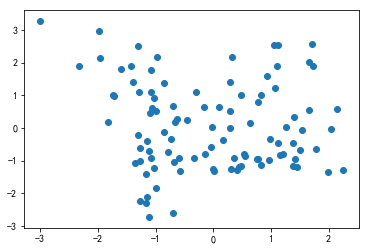

In [195]:
plt.scatter(X[:,0],X[:,1])

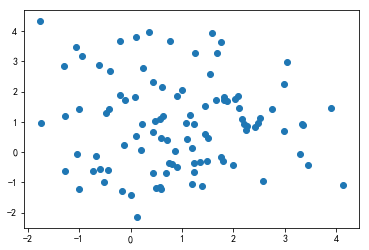

In [197]:
#从图上可以看出，生成的二分型数据的两个簇离彼此很远，这样不利于我们测试分类器的效果，因此我们使用np生成
# 随机数组，通过让已经生成的二分型数据点加减0~1之间的随机数，使数据分布变得更散更稀疏
#注意，这个过程只能够运行一次，因为多次运行之后X会变得非常稀疏，两个簇的数据会混合在一起，分类器的效应会
# 继续下降
rng = np.random.RandomState(2)  # 设置随机种子
X += 2 * rng.uniform(size=X.shape)

linearly_separable = (X, y)  #生成了新的X，依然可以画散点图来观察一下特征的分布
plt.scatter(X[:,0], X[:,1])

In [199]:
#用make_moons创建月亮型数据，make_circles创建环形数据，并将三组数据打包起来放在列表datasets中
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

## 画出三种决策树的分类效应图

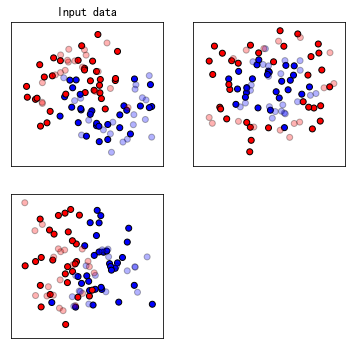

In [208]:
#创建画布，宽高比为6*9
figure = plt.figure(figsize=(6, 9))
#设置用来安排图像显示位置的全局变量i
i = 1
#开始迭代数据，对datasets中的数据进行for循环
for ds_index, ds in enumerate(datasets):
    X, y = ds
    # 对数据进行标准化处理
    X = StandardScaler().fit_transform(X)
    # print(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    # 找出数据集中两个特征的最大值和最小值，让最大值+0.5，最小值-0.5，创造一个比两个特征的区间本身更大
    # 一点的区间
    x1_min, x1_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    x2_min, x2_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    #用特征向量生成网格数据，网格数据，其实就相当于坐标轴上无数个点
    #函数np.arange在给定的两个数之间返回均匀间隔的值，0.2为步长
    #函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。
    #如果第一个数组是narray，维度是n，第二个参数是marray，维度是m。那么生成的第一个二维数组是以
    #narray为行，m行的矩阵，而第二个二维数组是以marray的转置为列，n列的矩阵
    #生成的网格数据，是用来绘制决策边界的，因为绘制决策边界的函数contourf要求输入的两个特征都必须是二
    #维的
    array1,array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
                                np.arange(x2_min, x2_max, 0.2))
    
    #接下来生成彩色画布
    #用ListedColormap为画布创建颜色，#FF0000正红，#0000FF正蓝
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    #在画布上加上一个子图，数据为len(datasets)行，2列，放在位置i上
    ax = plt.subplot(len(datasets), 2, i)
    
    #到这里为止，已经生成了0~1之间的坐标系3个了，接下来为我们的坐标系放上标题
    #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title("Input data")
    #将数据集的分布放到我们的坐标系上
    #先放训练集
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                cmap=cm_bright,edgecolors='k')
    
    #放测试集
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
                cmap=cm_bright, alpha=0.3,edgecolors='k')
    #为图设置坐标轴的最大值和最小值，并设定没有坐标轴
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    #每次循环之后，改变i的取值让图每次位列不同的位置
    i += 1

In [206]:
np.meshgrid([1,10,100],[2,20])

[array([[  1,  10, 100],
        [  1,  10, 100]]), array([[ 2,  2,  2],
        [20, 20, 20]])]